___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME

Tainara Soares Mendes

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


Ao desenvolver o presente projeto, objetivo analisar se a desinformação, na medida em que impede as populações carentes de tomarem ciência acerca dos programas sociais mantidos pelo governo, pode ser considerada um fator determinante na perpetuação da pobreza no Brasil. É perceptível, portanto, que escolhi o viés do acesso à Internet e TV para desenvolver o meu projeto. No entanto, quando abordo a questão da perpetuação da pobreza, a qual está diretamente relacionada com a questão da segurança alimentar, subentende-se que o meu projeto flutua entre ambos os temas dados, estando diretamente relacionado ao acesso à Internet e TV e indiretamente relacionado à seguridade alimentar.


___
## Análise e Resultados

In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
sns.set(style="whitegrid")

In [54]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\taina\Documents\ciência_dos_dados


In [55]:
data = pd.read_table('DOM2014.csv', encoding="Windows-1252",sep=",")

Primeiramente, para tornar a minha pesquisa mais restrita, analisarei qual é a região ou conjunto de regiões mais pobre do Brasil, para, posteriormente, filtrar os meus dados e analisar somente essa região ou conjunto de regiões em específico. Classifico como "pobre" a região ou conjunto de regiões que possui a menor renda per capita média por domicílio.

C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be 

count    115021.000000
mean       1225.589292
std        2153.332121
min           0.000000
25%         406.000000
50%         724.000000
75%        1300.000000
max      331200.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio, olhando o Brasil como um todo, é de 

R$ 722.93 

count    41926.000000
mean       520.798025
std        317.677946
min          0.000000
25%        266.000000
50%        466.000000
75%        724.000000
max       1409.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio nas regiões Norte e Nordeste é de 

R$ 520.80 

count    10621.000000
mean       866.927785
std        496.573728
min          0.000000
25%        491.000000
50%        742.000000
75%       1166.000000
max       2284.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio na região Centro-Oeste é de 

R$ 866.93 

count    46390.000000
mean       898.599784
std        507.160180
min          0.000000
25%       

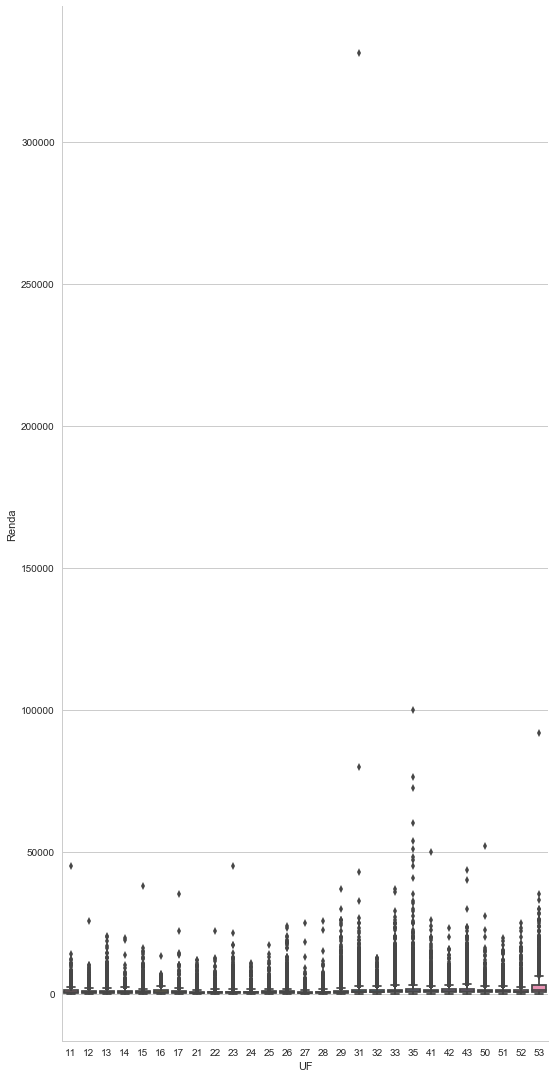

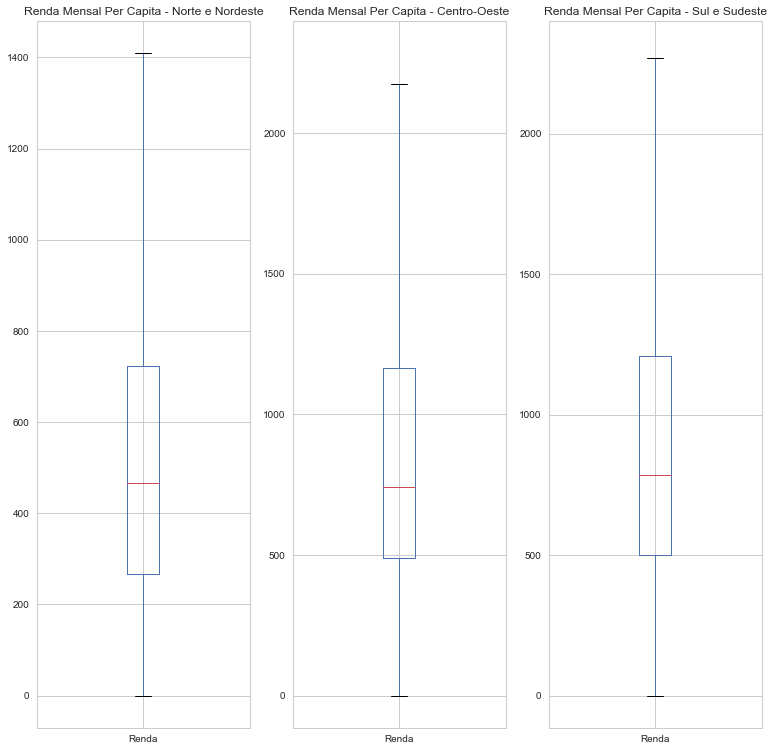

In [68]:
renda = pd.DataFrame({'UF': data.UF,
                      'Renda':data.V4621})




renda = renda.dropna()
renda = renda[(data.V4622>=0) & (data.V4622<=7)]
renda_brasil = renda[(data.V4621<1955)]
renda_norte_nordeste = renda[(data.UF>=11) & (data.UF<=29)]
renda_norte_nordeste = renda_norte_nordeste[(data.V4621<1410)]
renda_sul_sudeste = renda[(data.UF>=31) & (data.UF<=43)]
renda_sul_sudeste = renda_sul_sudeste[(data.V4621<2290)]
renda_centro_oeste = renda[(data.UF>=50) & (data.UF<=53)]
renda_centro_oeste = renda_centro_oeste[(data.V4621<2290)]
renda.UF = renda.UF.astype('category')
#renda.UF.cat.categories = (['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])


ax = sns.FacetGrid(renda, size=15, aspect=.5)
ax = sns.boxplot(x='UF', y='Renda', data=renda)


analise_brasil = renda['Renda'].describe()
mais_frequente_brasil = renda.mode()
variancia_brasil = renda.var()
analise_norte_nordeste = renda_norte_nordeste['Renda'].describe()
mais_frequente_norte_nordeste = renda_norte_nordeste.mode()
variancia_norte_nordeste = renda_norte_nordeste.var()
analise_centro_oeste = renda_centro_oeste['Renda'].describe()
mais_frequente_centro_oeste = renda_centro_oeste.mode()
variancia_centro_oeste = renda_centro_oeste.var()
analise_sul_sudeste = renda_sul_sudeste['Renda'].describe()
mais_frequente_sul_sudeste = renda_sul_sudeste.mode()
variancia_sul_sudeste = renda_norte_nordeste.var()



print(analise_brasil)
print("A média de rendimento per capita por domicílio, olhando o Brasil como um todo, é de \n")
print("R$ %.2f \n" %(renda_brasil['Renda'].mean()))
print(analise_norte_nordeste)
print("A média de rendimento per capita por domicílio nas regiões Norte e Nordeste é de \n")
print("R$ %.2f \n" %(renda_norte_nordeste['Renda'].mean()))
print(analise_centro_oeste)
print("A média de rendimento per capita por domicílio na região Centro-Oeste é de \n")
print("R$ %.2f \n" %(renda_centro_oeste['Renda'].mean()))
print(analise_sul_sudeste)
print("A média de rendimento per capita por domicílio nas regiões Sul e Sudeste é de \n")
print("R$ %.2f \n" %(renda_sul_sudeste['Renda'].mean()))



#print(renda.quantile(np.arange(0,1.10,.10)))


#print(renda_centro_oeste['Renda'].mean())


fig, axes = plt.subplots(nrows=1, ncols=3)

#renda_brasil['Renda'].plot(kind='box', figsize=(5,5), ax=axes[0,0]); axes[0,0].set_title('A');

renda_norte_nordeste['Renda'].plot(kind='box', figsize=(13,13),ax=axes[0]).set_title('Renda Mensal Per Capita - Norte e Nordeste');

renda_centro_oeste['Renda'].plot(kind='box', figsize=(13,13),ax=axes[1]).set_title('Renda Mensal Per Capita - Centro-Oeste');

renda_sul_sudeste['Renda'].plot(kind='box', figsize=(13,13),ax=axes[2]).set_title('Renda Mensal Per Capita - Sul e Sudeste');


#plt.ylabel('Densidade')

#plt.figure();

#renda.plot.hist(alpha=1)


#plot = renda.plot(kind='box',title='Renda',figsize=(10,10)).grid()
#plot = plt.subplot(1,2,1)


Ao observar os gráficos gerados, é notável a grande disparidade social existente no Brasil, não somente entre regiões, como também internamente em cada um dos estados...



Comprovada a condição de que as regiões Norte e Nordeste são as mais pobres do Brasil, filtro os meus dados de modo a analisar a questão da desinformação somente nessa região.

In [52]:
df = pd.DataFrame({'Baixa_Renda': data.V4622,
                   'Radio': data.V0225,
                   'TV_cores': data.V0226,
                   'Internet': data.V02322,
                   'Info_Cad_Único' : data.V33001,
                   'Prog_Sociais' : data.V33002})

df = df[(data.V4622==0) | (data.V4622==1) | (data.V4622==2)]
df = df[(data.UF>=11) & (data.UF<=29)]

df = df.dropna()
df.Info_Cad_Único = df.Info_Cad_Único.astype('category')
df.Info_Cad_Único.cat.categories = (['Não'])
df.Internet = df.Internet.astype('category')
df.Internet.cat.categories = (['Sim', 'Não'])
df.Prog_Sociais = df.Prog_Sociais.astype('category')
df.Prog_Sociais.cat.categories = (['Sim','Não'])
df.Radio = df.Radio.astype('category')
df.Radio.cat.categories = (['Sim','Não'])
df.TV_cores = df.TV_cores.astype('category')
df.TV_cores.cat.categories = (['Sim','Não'])


C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [59]:
abs_freq_prog_sociais = df.Prog_Sociais.value_counts().reindex(['Sim', 'Não'])
print('Frequências absolutas (Conhecimento acerca dos Programas Sociais mantidos pelo governo:')
print(abs_freq_prog_sociais,'\n')

abs_freq_cad_unico = df.Info_Cad_Único.value_counts().reindex(['Sim', 'Não'])
print('Frequências absolutas (Conhecimento acerca do Cadastro Único de Programas Sociais do Governo Federal:')
print(abs_freq_cad_unico,'\n')

abs_freq_internet = df.Internet.value_counts().reindex(['Sim', 'Não'])
print('Frequências absolutas (Pessoas que possuem acesso à Internet no próprio domicílio:')
print(abs_freq_internet,'\n')

abs_freq_TV = df.TV_cores.value_counts().reindex(['Sim', 'Não'])
print('Frequências absolutas (Pessoas que possuem TV em cores:)')
print(abs_freq_TV,'\n')

abs_freq_radio = df.Radio.value_counts().reindex(['Sim', 'Não'])
print('Frequências absolutas (Pessoas que possuem rádio:)')
print(abs_freq_radio,'\n')

Frequências absolutas (Conhecimento acerca dos Programas Sociais mantidos pelo governo:
Sim    5389
Não     536
Name: Prog_Sociais, dtype: int64 

Frequências absolutas (Conhecimento acerca do Cadastro Único de Programas Sociais do Governo Federal:
Sim       NaN
Não    5925.0
Name: Info_Cad_Único, dtype: float64 

Frequências absolutas (Pessoas que possuem acesso à Internet no próprio domicílio:
Sim    1843
Não    4082
Name: Internet, dtype: int64 

Frequências absolutas (Pessoas que possuem TV em cores:)
Sim    5562
Não     363
Name: TV_cores, dtype: int64 

Frequências absolutas (Pessoas que possuem rádio:)
Sim    3528
Não    2397
Name: Radio, dtype: int64 



___
## Conclusão 

Descreva aqui suas conclusões!